In [43]:
from fastai.vision.all import *

In [56]:
birds = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(0.2),
                  get_y=parent_label,
                  item_tfms=Resize(512),
                  batch_tfms=[*aug_transforms(size=512, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [57]:
dls = birds.dataloaders('./data_task1/train/',  bs=32)

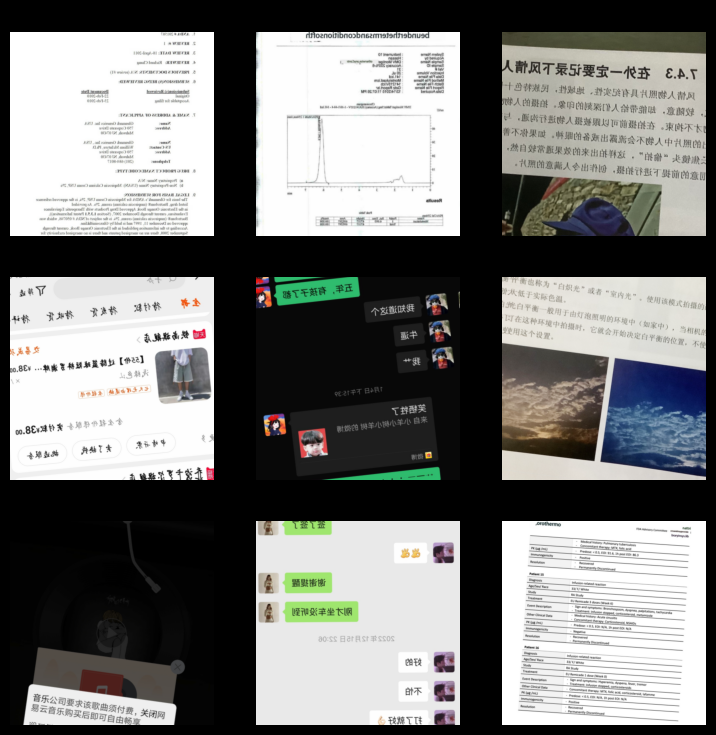

In [58]:
dls.show_batch(max_n=9)

In [59]:
dls.vocab

['tampered', 'untampered']

In [60]:
learn = cnn_learner(dls, resnet101, pretrained=True, metrics=error_rate).to_fp16()

/home/pusl/anaconda3/envs/tianchi/lib/python3.7/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/pusl/anaconda3/envs/tianchi/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/home/pusl/anaconda3/envs/tianchi/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.wa

In [61]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.827531,0.710388,0.257091,00:43
1,0.562631,0.485323,0.209415,00:44
2,0.449833,0.421274,0.214846,00:44
3,0.403612,0.435366,0.201569,00:45


In [62]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [63]:
learn.unfreeze()

SuggestedLRs(valley=9.120108734350652e-05)

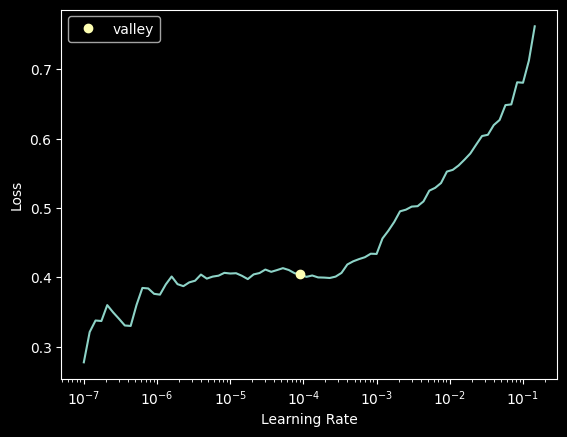

In [64]:
learn.lr_find()

In [65]:
learn.fit_one_cycle(10, lr_max=slice(6e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.392299,0.448351,0.217864,00:52
1,0.406108,0.377825,0.184671,00:52
2,0.371707,0.332761,0.162342,00:52
3,0.338799,0.330710,0.155703,00:52
4,0.307973,0.326956,0.155703,00:51
5,0.258328,0.302551,0.147254,00:51
6,0.243095,0.286662,0.144237,00:52
7,0.223168,0.304783,0.149065,00:52
8,0.190917,0.313381,0.146651,00:51
9,0.178159,0.315794,0.147254,00:51


In [66]:
learn.load('stage-1')

In [67]:
learn.unfreeze()

In [68]:
learn.fit_one_cycle(7, lr_max=slice(6e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.420272,0.448209,0.224502,00:53
1,0.395458,0.338576,0.161738,00:53
2,0.352444,0.311303,0.152686,00:51
3,0.319063,0.290435,0.140616,00:52
4,0.266593,0.286831,0.140616,00:53
5,0.226811,0.283357,0.131563,00:52
6,0.218139,0.299524,0.130356,00:51


In [69]:
learn.save('stage-2')

Path('models/stage-2.pth')

In [75]:
learn.fit_one_cycle(4, lr_max=slice(6e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.266386,0.806265,0.312613,00:52
1,0.263480,0.323155,0.149668,00:52
2,0.230571,0.317817,0.142426,00:52
3,0.198481,0.306702,0.141219,00:52


In [70]:
base_dir = './dataset/imgs/'
import os
files = os.listdir(base_dir)
files.sort()
preds = []
for f in files:
    score = learn.predict(base_dir + f)[2][0].item()
    preds.append(score)



In [73]:
import pandas as pd

data = {'img_name':files, 'score':preds}
df = pd.DataFrame(data)

print (df)


      img_name     score
0     0000.jpg  0.997077
1     0001.jpg  0.000488
2     0002.jpg  0.940808
3     0003.jpg  0.956634
4     0004.jpg  0.594198
...        ...       ...
3095  3095.jpg  0.000075
3096  3096.jpg  0.998442
3097  3097.jpg  0.629433
3098  3098.jpg  0.050331
3099  3099.jpg  0.893030

[3100 rows x 2 columns]


In [74]:
df.to_csv('resnet101-fastai-2-26.csv', index=False, header=False, sep=' ')